# Employee Exit Surveys from Australia's DETE and TAFE Institute
###### Completed by Sean Richardson for DataQuest's Data Cleaning and Analysis Certificate
In this project, we will clean and analyze employee exit surveys from Australia's Department of Education, Training and Employment (DETE) and Technical and Further Education (TAFE) Institute.

The data sets can be downloaded here:
- [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
- [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)


We will combine the data sets to determine to what extent dissatisfaction is a source of resignation for each of the following groups of employees:
- Short-term employees
- Long-term employees
- Younger employees
- Older employees

First, we do some basic exploration to identify existing formats within each data set, and also to identify similarities and differences between the two data sets. We then clean and combine the data in preparation for analysis and visualization.

In [1]:
# imports pandas and NumPy libraries
import pandas as pd
import numpy as np
# reads in data
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
# displays information about dete_survey
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# displays information about tafe_survey
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [5]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


We can make the following observations:
- The DETE data set has 56 columns, while the TAFE data set has 72.
- The DETE data set contains a combination of bool and string data types.
- The TAFE data set contains almost entirely string data types.
- The two data sets have different column names, although many represent the same information
- Both data sets have many columns that are irrelevant to our analysis.
- Null values may not be accurately represented in the data sets. For example, the second row of dete_survey has several columns with 'Not Stated'.

Next we fix some of these issues to get the data in an appropriate format for aggregation and analysis.

In [6]:
# transforms missing data
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [7]:
# drops unnecessary columns, copies data frames
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [8]:
# standardizes the column names in dete_survey_updated
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [9]:
# changes column names in tafe_survey_updated to match those in dete_survey_updated
new_col = {'Record ID':'id',
'CESSATION YEAR':'cease_date',
'Reason for ceasing employment':'separationtype',
'Gender. What is your Gender?':'gender',
'CurrentAge. Current Age':'age',
'Employment Type. Employment Type':'employment_status',
'Classification. Classification':'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=new_col)

Since we are interested in understanding the causes of resignation among different groups of employees, we are only concerned with employees who ceased employment because they resigned.

We can see that the 'separationtype' column in both data frames gives us information about the reason for ceasing employment.

In [10]:
# identifies unique values
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
# identifies unique values
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

We can see the following:
- In dete_survey_updated, the 'separationtype' column has 3 distinct values which each represent resignation as the reason for ceasing employment: 'Resignation-Other reasons', 'Resignation-Other employer', and 'Resignation-Move overseas/interstate'.
- There is only one such value in tafe_survey_updated: 'Resignation.

We will convert the 3 distinct values in dete_survey_updated into a single value and then select only employees who resigned.

In [12]:
# converts the values in dete_survey_updated
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
# confirms our change
dete_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [13]:
# creates new data frames for only those employees who resigned
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Now that we have a more restricted data set, we will look for corrupt data within important columns.

We first focus on columns within dete_resignations which will tell us about each employee's years of service at DETE, since this information will allow us to group employees into short-term and long-term categories:
- The 'cease_date' column tells us when an employee stopped working. It should not have any years after the current date.
- The 'dete_start_date' column tells us when an employee started working. It should not have any years prior to 1940, since most people enter the work force in their 20's, which would make someone who started in 1940 nearly 100 years old today.
- There should not be any rows for which the year in 'cease_date' comes after the year in 'dete_start_date'.

In [14]:
# inspects unique values in 'case_date'
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [15]:
# extracts year from values to create a uniform format
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
# converts the years to numeric data
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')
# confirms our change
dete_resignations['cease_date'].value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

In [16]:
# inspects unique values in 'dete_start_date'
dete_resignations['dete_start_date'].value_counts(dropna=False)

NaN        28
 2011.0    24
 2008.0    22
 2007.0    21
 2012.0    21
 2010.0    17
 2005.0    15
 2004.0    14
 2009.0    13
 2006.0    13
 2013.0    10
 2000.0     9
 1999.0     8
 1998.0     6
 2002.0     6
 1994.0     6
 1996.0     6
 1992.0     6
 2003.0     6
 1980.0     5
 1990.0     5
 1993.0     5
 1997.0     5
 1989.0     4
 1995.0     4
 1988.0     4
 1991.0     4
 2001.0     3
 1986.0     3
 1985.0     3
 1976.0     2
 1983.0     2
 1974.0     2
 1963.0     1
 1972.0     1
 1984.0     1
 1975.0     1
 1973.0     1
 1987.0     1
 1982.0     1
 1971.0     1
 1977.0     1
Name: dete_start_date, dtype: int64

In [17]:
# calculates the earliest and latest years in each column
print(dete_resignations['cease_date'].min())
print(dete_resignations['cease_date'].max())
print(dete_resignations['dete_start_date'].min())
print(dete_resignations['dete_start_date'].max())

2006.0
2014.0
1963.0
2013.0


The years within dete_resignations appear valid based on the constraints above. We will leave the null values as is.

Next we look at tafe_resignations.
- There is an equivalent 'cease_date' column, which we will subject to the same constraints as in dete_resignations.
- There is no equivalent column for the start date. Instead, tafe_resignations contains 'institute_service', which represents each employee's years of service. It is extremely unlikely for an employee to work for more than 80 years, since that would make them over 100 years today if they started at age 20, so we will define any values greater than 80 as corrupt.

In [18]:
# inspects unique values in 'cease_date'
tafe_resignations['cease_date'].value_counts(dropna=False)

 2011.0    116
 2012.0     94
 2010.0     68
 2013.0     55
NaN          5
 2009.0      2
Name: cease_date, dtype: int64

In [19]:
# inspects unique values in 'cease_date'
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

The years within tafe_resignations appear valid based on the constraints above. We will leave the null values as is.

In order to combine the two data sets and group employees based on their years of service, we create an 'institute_service' column within dete_resignations. It will be given the difference in years between an employee's cease and start date.

In [20]:
# creates new column within dete_resignations
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
# inspects unique values in 'institute_service'
dete_resignations['institute_service'].value_counts(dropna=False)

NaN      38
 5.0     23
 1.0     22
 3.0     20
 0.0     20
 6.0     17
 4.0     16
 9.0     14
 2.0     14
 7.0     13
 13.0     8
 8.0      8
 20.0     7
 15.0     7
 12.0     6
 22.0     6
 17.0     6
 10.0     6
 14.0     6
 16.0     5
 18.0     5
 24.0     4
 23.0     4
 11.0     4
 39.0     3
 32.0     3
 19.0     3
 21.0     3
 36.0     2
 30.0     2
 25.0     2
 28.0     2
 26.0     2
 29.0     1
 42.0     1
 38.0     1
 27.0     1
 41.0     1
 35.0     1
 49.0     1
 34.0     1
 33.0     1
 31.0     1
Name: institute_service, dtype: int64

We do not see any negative values, so we know that there are not any rows for which the year in the 'cease_date' comes after the year in 'dete_start_date'. The years of service data therefore appears valid in both data frames and is ready for analysis. We will leave the null values as is.

We will need to make the values in each data frame's 'institute_service' column more uniform, but first we identify columns that are relevant to whether dissatisfaction was the cause of an employee's resignation.

In [21]:
print(tafe_resignations.columns)
print(dete_resignations.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_privat

The following columns in tafe_resignations give us information about whether dissatisfaction was the cause of an employee's resignation:
- 'Contributing Factors. Dissatisfaction'
- 'Contributing Factors. Job Dissatisfaction'

And the following columns in dete_resignations do the same, since they all pertain to work conditions:
- 'job_dissatisfaction'
- 'dissatisfaction_with_the_department'
- 'physical_work_environment'
- 'lack_of_recognition'
- 'lack_of_job_security'
- 'work_location'
- 'employment_conditions'
- 'work_life_balance'
- 'workload'

We will add a new column to each data frame that marks an employee as dissatisfied if any of the columns listed above indicate dissatisfaction. We do this by tranforming the columns to hold boolean values and then comparing the columns.

In [22]:
# identifies existing format
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
# defines a function to update the values in the relevant columns of tafe_registration
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [24]:
# creates a new column in tafe_resignations that holds boolean values
# holds True if either of the two dissatisfaction columns were updated with True
# holds False if neither of the two dissatisfaction columns were updated with True or NaN
# holds NaN if either of the two columns were updated with NaN
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

In [25]:
# confirms our change
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [26]:
# creates a new column in dete_resignations based on the same logic
# the dissatisfaction columns in dete_resignations already contain boolean values so we don't need to use our function
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].any(axis=1, skipna=False)

In [27]:
# confirms our change
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [28]:
# makes copies of each data frame for further manipulation
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Now we have a column in each data frame that tells us whether the reason for an employee's ceasing employment was job dissatisfaction.

We are almost in a position to begin answering our questions about the prevalence of dissatisfaction as the source of resignation within particular groups of employees. But first we need to combine the data sets, since we are trying to answer this question about the two institutes considered in aggregate.

In [29]:
# adds a column to each data frame representing the institute, preserving information once the data is combined
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
# combines the two data frames vertically
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [30]:
# creates a new data frame which drops all columns with less than 500 non-null values
# preserves 'institute', 'dissatisfied', 'institute_service', 'age', and other columns which we could use for further analysis
combined_updated = combined.dropna(thresh = 500, axis=1).copy()

In [31]:
# confirms our change
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


Next we clean up 'institute_service' to create uniformity in values. We will transform the year values into four categories according to the following template:
- New: Less than 3 years employed
- Experienced: 3-6 years employed
- Established: 7-10 years employed
- Veteran: 11+ years employed

In [32]:
# identifies existing format
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [33]:
# extracts the number of years from each value in 'institute_service'
# puts these values in 'institute_service_up' as numeric data
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)', expand=False)
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
# confirms our change
combined_updated['institute_service_up'].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In [34]:
# defines a function that categorizes years of service per the template above
def years_to_cat(years):
    if pd.isnull(years):
        return np.nan
    elif years in range (0, 3):
        return 'new'
    elif years in range (3, 7):
        return 'experienced'
    elif years in range (7, 11):
        return 'established'
    else:
        return 'veteran'

In [35]:
# creates a new column, 'service_cat', using the function above to fill in values
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(years_to_cat)
# confirms our change
combined_updated['service_cat'].value_counts(dropna=False)

new            193
experienced    172
veteran        136
NaN             88
established     62
Name: service_cat, dtype: int64

In [36]:
# identifies unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We still have 8 null values in 'dissatisfied' that we have to deal with. We will fill these in with the most frequent value in the column, False.

In [37]:
# fills in null values with False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

Now we can analyze the relatioship between dissatisfaction and service category.

In [38]:
# creates a new series, service_cat_vs_dissatisfied, which shows the percentage of dissatisfied employees within each service category
service_cat_vs_dissatisfied = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
service_cat_vs_dissatisfied['dissatisfied'] = service_cat_vs_dissatisfied['dissatisfied'] * 100

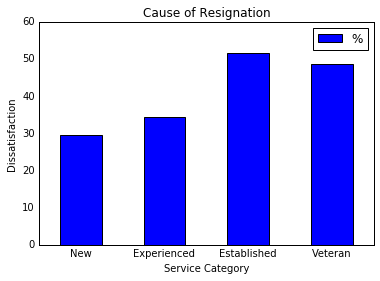

In [39]:
# plots the percentage of dissatisfied employees within each service category
%matplotlib inline
ax1 = service_cat_vs_dissatisfied.reindex(['new', 'experienced', 'established', 'veteran']).plot(kind='bar', legend=True)
ax1.set_ylabel('Dissatisfaction')
ax1.set_xlabel('Service Category')
ax1.legend(labels='%')
ax1.set_xticklabels(labels=['New', 'Experienced', 'Established', 'Veteran'], rotation=0)
ax1.tick_params(top='off', right='off', bottom='off', left='off')
ax1.set_title('Cause of Resignation')

From the bar chart above, we can see that short-term employees are much less likely than long-term employees to resign because of dissatisfaction.

We next clean up the 'age' column for further analysis.

In [40]:
# identifies existing format
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [41]:
# converts values to strings, extracts age for new column 'age_updated', and converts back to numeric data
combined_updated['age_updated'] = combined_updated['age'].astype('str').str.extract(r'(\d+)', expand=False)
combined_updated['age_updated'] = combined_updated['age_updated'].astype('float')
combined_updated['age_updated'].value_counts(dropna=False)

 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: age_updated, dtype: int64

In [42]:
# fills in null values with mean age
mean_age = combined_updated['age_updated'].mean()
combined_updated['age_updated'] = combined_updated['age_updated'].fillna(mean_age)
combined_updated['age_updated'].value_counts(dropna=False)

41.000000    93
46.000000    81
36.000000    73
51.000000    71
26.000000    67
21.000000    62
31.000000    61
39.271812    55
56.000000    55
61.000000    23
20.000000    10
Name: age_updated, dtype: int64

In [43]:
# defines a function for converting years of age to categories
def age_to_cat(age):
    if age in range(20,30):
        return '20-30'
    elif age in range(30,40):
        return '30-40'
    elif age in range(40,50):
        return '40-50'
    elif age in range(50,60):
        return '50-60'
    else:
        return '60+'

In [44]:
# creates a new column, mapping years of age to categories
combined_updated['age_cat'] = combined_updated['age_updated'].apply(age_to_cat)

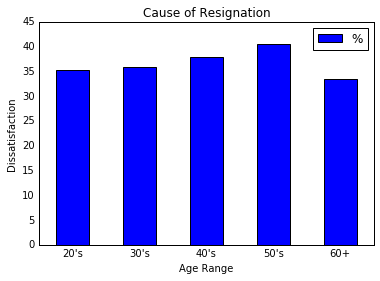

In [45]:
# plots the percentage of dissatisfied employees within each age range
age_cat_vs_dissatisfied = combined_updated.pivot_table(values='dissatisfied', index='age_cat')
age_cat_vs_dissatisfied['dissatisfied'] = age_cat_vs_dissatisfied['dissatisfied'] * 100
ax2 = age_cat_vs_dissatisfied.plot(kind='bar', legend=True)
ax2.set_ylabel('Dissatisfaction')
ax2.set_xlabel('Age Range')
ax2.legend(labels='%')
ax2.set_xticklabels(labels = ["20's", "30's", "40's", "50's", "60+"], rotation=0)
ax2.tick_params(top='off', right='off', bottom='off', left='off')
ax2.set_title('Cause of Resignation')

From the bar chart above, we see that older employees are very slightly more likely than younger employees to resign because of dissatisfaction, although this pattern does not hold for the 60+ year-old age group.

We should, however, be somewhat wary of the generalizability of these findings before examining the size of service and age categories. We would like for all of the categories to be decently sized to avoid making unjustified inferences.

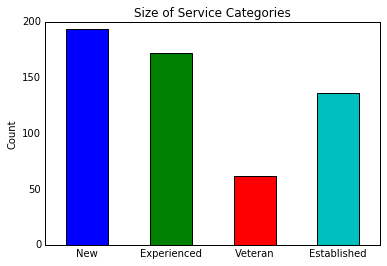

In [46]:
# plots size of service categories
ax3 = combined_updated['service_cat'].value_counts().reindex(['new', 'experienced', 'established', 'veteran']).plot(kind='bar')
ax3.set_ylabel('Count')
ax3.set_xticklabels(labels=['New', 'Experienced', 'Veteran', 'Established'], rotation=0)
ax3.tick_params(top='off', right='off', bottom='off', left='off')
ax3.set_title('Size of Service Categories')

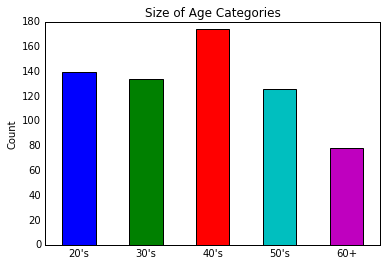

In [47]:
# plots size of age categories
ax4 = combined_updated['age_cat'].value_counts().reindex(['20-30', '30-40', '40-50', '50-60', '60+']).plot(kind='bar')
ax4.set_ylabel('Count')
ax4.set_xticklabels(labels = ["20's", "30's", "40's", "50's", "60+"], rotation=0)
ax4.tick_params(top='off', right='off', bottom='off', left='off')
ax4.set_title('Size of Age Categories')

## Conclusions
After cleaning and aggregating the data, we can see that dissatisfaction is a more common cause of resignation among long-term employees but only a slightly more common cause among older employees.

Since all of the categories are decently sized, it seems appropriate to expect this pattern more generally.

Some possible explanations for this:
- Long-term employees may have reached a ceiling in their career advancement.
- Long-term employees may have witnessed a shift in their job environment from how it was when they are initially hired and are unhappy with the changes.
- Older employees may have accumulated more wealth and so are less willing to continue working when they feel dissatisfied.